In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
df = pd.read_csv("The_Cigarette_Consumption_Panel_Data_Set_519_55.csv").drop(
        ["Unnamed: 0", "X"], 
        axis = 1
        )

df.head()

,state,year,cpi,pop,packpc,income,tax,avgprs,taxs
0,AL,1985,1.076,3973000,116.486282,46014968,32.500004,102.181671,33.348335
1,AR,1985,1.076,2327000,128.534592,26210736,37.000000,101.474998,37.000000
2,AZ,1985,1.076,3184000,104.522614,43956936,31.000000,108.578751,36.170418
3,CA,1985,1.076,26444000,100.363037,447102816,26.000000,107.837341,32.104000
4,CO,1985,1.076,3209000,112.963539,49466672,31.000000,94.266663,31.000000


In [12]:
df["income_per_capita"] = df["income"] / df["pop"]

In [13]:
X_with_state_dummies = pd.get_dummies(df[['avgprs', 'income_per_capita', 'year', 'state']], 
                                       columns=['state'], drop_first=True, dtype="int")

y = df["packpc"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_with_state_dummies, y, test_size=0.33, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R² manually
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

Mean Squared Error (MSE): 23.0809
Root Mean Squared Error (RMSE): 4.8043
Mean Absolute Error (MAE): 3.7137
R² (Coefficient of Determination): 0.9535
Adjusted R²: 0.9347


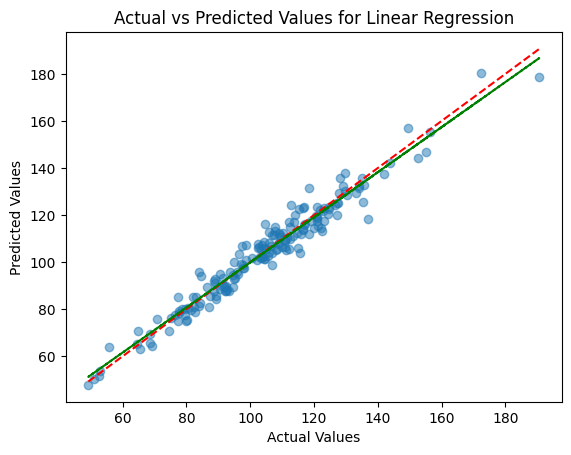

In [17]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

#add a trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'g--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()

In [18]:
coefficients = model.coef_
intercept = model.intercept_

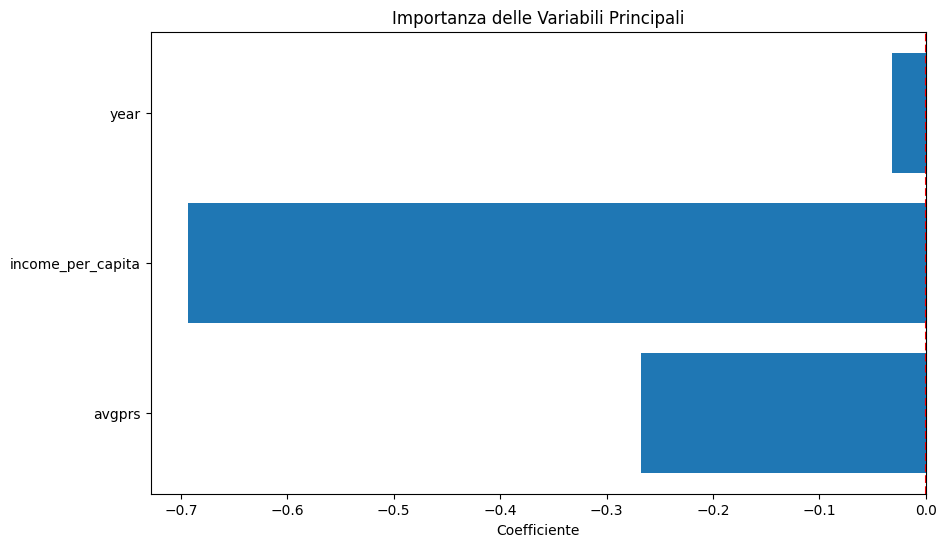

In [19]:
# Escludi i coefficienti delle dummy (troppi)
main_features = ['avgprs', 'income_per_capita', 'year']
main_coefs = coefficients[:3]

plt.figure(figsize=(10, 6))
plt.barh(main_features, main_coefs)
plt.xlabel('Coefficiente')
plt.title('Importanza delle Variabili Principali')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()